<a href="https://colab.research.google.com/github/Abigail6on/Apple-Health-Sleep-Analysis/blob/main/health_data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data and Engineer New Features

In [2]:
import os
import pandas as pd

# Define the directory containing the CSV files
csv_directory = '/content/'

# Get a list of all files in the directory
all_files = os.listdir(csv_directory)

# Filter the list to include only CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create an empty dictionary to store the DataFrames
dataframes = {}

# Define a dictionary for renaming columns
column_rename_mapping = {
    'HKQuantityTypeIdentifierStepCount': 'StepCount',
    'HKQuantityTypeIdentifierHeartRate': 'HeartRate',
    'HKQuantityTypeIdentifierDistanceWalkingRunning': 'DistanceWalkingRunning',
    'HKQuantityTypeIdentifierWalkingSpeed': 'WalkingSpeed',
    'HKQuantityTypeIdentifierWalkingStepLength': 'WalkingStepLength',
    'HKQuantityTypeIdentifierPhysicalEffort': 'PhysicalEffort',
    'HKQuantityTypeIdentifierActiveEnergyBurned': 'ActiveEnergyBurned',
    'HKQuantityTypeIdentifierWalkingHeartRateAverage': 'WalkingHeartRateAverage',
    'HKQuantityTypeIdentifierWalkingAsymmetryPercentage': 'WalkingAsymmetryPercentage',
    'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage': 'WalkingDoubleSupportPercentage',
    'HKQuantityTypeIdentifierStairAscentSpeed': 'StairAscentSpeed',
    'HKQuantityTypeIdentifierStairDescentSpeed': 'StairDescentSpeed',
    'HKQuantityTypeIdentifierAppleWalkingSteadiness': 'WalkingSteadiness',
    'weekday': 'Weekday'
}

In [3]:
# Loop through the CSV files and read each one into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df_name = os.path.splitext(csv_file)[0]
    dataframes[df_name] = pd.read_csv(file_path)

# Rename columns in the cleaned_daily_health_data DataFrame
if 'cleaned_daily_health_data' in dataframes:
    dataframes['cleaned_daily_health_data'].rename(columns=column_rename_mapping, inplace=True)


# Display the keys of the dictionary to show the names of the loaded DataFrames
print("Loaded DataFrames:")
print(dataframes.keys())

# Display columns of the renamed dataframe
if 'cleaned_daily_health_data' in dataframes:
    print("\nColumns of cleaned_daily_health_data after renaming:")
    print(dataframes['cleaned_daily_health_data'].columns)

/tmp/ipython-input-3762186988.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[df_name] = pd.read_csv(file_path)


Loaded DataFrames:
dict_keys(['cleaned_daily_health_data', 'generally_cleaned_health_data', 'merged_heart_rate_physical_effort', 'sleep_heart_rate_data', 'sleep_sessions'])

Columns of cleaned_daily_health_data after renaming:
Index(['date', 'HKDataTypeSleepDurationGoal', 'ActiveEnergyBurned',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierAppleSleepingBreathingDisturbances',
       'HKQuantityTypeIdentifierAppleSleepingWristTemperature',
       'HKQuantityTypeIdentifierAppleStandTime', 'WalkingSteadiness',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierDietaryCarbohydrates',
       'HKQuantityTypeIdentifierDietaryEnergyConsumed',
       'HKQuantityTypeIdentifierDietaryFatTotal',
       'HKQuantityTypeIdentifierDietaryProtein',
       'HKQuantityTypeIdentifierDistanceSwimming', 'DistanceWalkingRunning',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       

# Predict ActiveEnergyBurned

* Target: ActiveEnergyBurned Regression


* Features: StepCount, HeartRate, DistanceWalkingRunning, WalkingSpeed, WalkingStepLength, PhysicalEffort

* Models: LinearRegression + RandomForest + XGBoost

* Metrics: MAE, R², RMSE

* Visual: Actual vs Predicted plot

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Select features and target using the new, renamed column names
features = ['StepCount',
            'HeartRate',
            'DistanceWalkingRunning',
            'WalkingSpeed',
            'WalkingStepLength',
            'PhysicalEffort']
target = 'ActiveEnergyBurned'

# Create a new dataframe with only the selected features and target
df_model = dataframes['cleaned_daily_health_data'][features + [target]].copy()

# Handle missing values
# Drop rows where the target variable is missing
df_model.dropna(subset=[target], inplace=True)

# Impute missing values in features using the mean
for feature in features:
    if feature in df_model.columns:
        df_model[feature].fillna(df_model[feature].mean(), inplace=True)

print("Data preparation complete.")

Data preparation complete.


/tmp/ipython-input-3717867475.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[feature].fillna(df_model[feature].mean(), inplace=True)


In [5]:
# Separate features (X) and target (y)
X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature variables - for linear regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling in the next steps
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

print("Data preparation complete.")
print("X_train_scaled_df shape:", X_train_scaled_df.shape)
print("X_test_scaled_df shape:", X_test_scaled_df.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

display(X_train_scaled_df.head())
display(y_train.head())

Data preparation complete.
X_train_scaled_df shape: (844, 6)
X_test_scaled_df shape: (211, 6)
y_train shape: (844,)
y_test shape: (211,)


,StepCount,HeartRate,DistanceWalkingRunning,WalkingSpeed,WalkingStepLength,PhysicalEffort
1674,-0.764217,-0.003748,-0.629837,-0.126301,-0.646186,0.014669
2111,-1.365072,0.266136,-1.128770,0.412150,-0.540849,1.731912
1795,-0.465178,-0.003748,-0.288301,-0.092648,0.442292,0.014669
1715,0.167419,-0.003748,0.281677,-0.326351,-0.583764,0.014669
1730,-0.503899,-0.003748,-0.362359,1.169347,0.878687,0.014669


,ActiveEnergyBurned
1674,0.853556
2111,1.468151
1795,1.219111
1715,1.569200
1730,1.051227


## Model training

Train Linear Regression, RandomForest, and XGBoost models on the training data.


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_df, y_train)
print("Linear Regression model trained.")

# Instantiate and train RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled_df, y_train)
print("Random Forest model trained.")

# Instantiate and train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled_df, y_train)
print("XGBoost model trained.")

Linear Regression model trained.
Random Forest model trained.
XGBoost model trained.


## Model evaluation

Evaluate the performance of each model using MAE, R², and RMSE metrics on the testing data.


### Define evaluation function for regression models

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

def evaluate_regression_model(model, X_test, y_test, model_name):
    """
    Evaluates a regression model and returns common metrics (MAE, R2, RMSE).

    Args:
        model: Trained regression model.
        X_test: Test features.
        y_test: Test target values.
        model_name: Name of the model for printing.

    Returns:
        dict: A dictionary containing the evaluation metrics ('MAE', 'R2', 'RMSE').
    """
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics = {'MAE': mae,
               'R2': r2,
               'RMSE': rmse}

    print(f"\n{model_name}:")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")

    return metrics

In [8]:
# Create an empty dictionary to store the evaluation results
model_results = {}

print("Model Evaluation Results:")

# Evaluate Linear Regression model
model_results['Linear Regression'] = evaluate_regression_model(
    lr_model, X_test_scaled_df, y_test, 'Linear Regression'
)

# Evaluate RandomForestRegressor model
model_results['Random Forest'] = evaluate_regression_model(
    rf_model, X_test_scaled_df, y_test, 'Random Forest'
)

# Evaluate XGBoost model
model_results['XGBoost'] = evaluate_regression_model(
    xgb_model, X_test_scaled_df, y_test, 'XGBoost'
)

Model Evaluation Results:

Linear Regression:
  MAE: 0.3483
  R2: 0.8157
  RMSE: 0.4489

Random Forest:
  MAE: 0.3295
  R2: 0.7535
  RMSE: 0.5191

XGBoost:
  MAE: 0.3438
  R2: 0.5293
  RMSE: 0.7173


## Model comparison

Compare the performance of the three models based on the evaluation metrics.


### Define comparision function for regression models

In [9]:
def compare_regression_models(model_results, task_name):
    """
    Compares regression model performance based on MAE, R2, and RMSE.

    Args:
        model_results (dict): A dictionary where keys are model names and values are dictionaries
                              containing 'MAE', 'R2', and 'RMSE' metrics.
        task_name (str): The name of the regression task (e.g., 'Active Energy Burned').
    """
    print(f"Comparing Model Performance for {task_name}:")
    for model_name, metrics in model_results.items():
        print(f"\n{model_name}:")
        print(f"  MAE: {metrics['MAE']:.4f}")
        print(f"  R2: {metrics['R2']:.4f}")
        print(f"  RMSE: {metrics['RMSE']:.4f}")

    # Determine the best model based on metrics
    best_mae_model = min(model_results, key=lambda k: model_results[k]['MAE'])
    best_rmse_model = min(model_results, key=lambda k: model_results[k]['RMSE'])
    best_r2_model = max(model_results, key=lambda k: model_results[k]['R2'])

    print(f"\nModel with lowest MAE: {best_mae_model} (MAE: {model_results[best_mae_model]['MAE']:.4f})")
    print(f"Model with lowest RMSE: {best_rmse_model} (RMSE: {model_results[best_rmse_model]['RMSE']:.4f})")
    print(f"Model with highest R2: {best_r2_model} (R2: {model_results[best_r2_model]['R2']:.4f})")

    # Based on the results, identify the best performing model overall.
    # R2 is often a primary metric for regression model fit, while MAE and RMSE measure error.
    # A high R2 and low MAE/RMSE are desirable.
    # You can adjust this logic based on which metric is most important for your task.
    best_overall_model = best_r2_model # Example: prioritize R2
    print(f"\nBased on R2, the best performing model for {task_name} is: {best_overall_model}")

In [10]:
# Use the compare_regression_models function to compare models for Active Energy Burned
compare_regression_models(model_results, 'Active Energy Burned')

Comparing Model Performance for Active Energy Burned:

Linear Regression:
  MAE: 0.3483
  R2: 0.8157
  RMSE: 0.4489

Random Forest:
  MAE: 0.3295
  R2: 0.7535
  RMSE: 0.5191

XGBoost:
  MAE: 0.3438
  R2: 0.5293
  RMSE: 0.7173

Model with lowest MAE: Random Forest (MAE: 0.3295)
Model with lowest RMSE: Linear Regression (RMSE: 0.4489)
Model with highest R2: Linear Regression (R2: 0.8157)

Based on R2, the best performing model for Active Energy Burned is: Linear Regression


## Visualization

Create an Actual vs Predicted plot for the best-performing model.


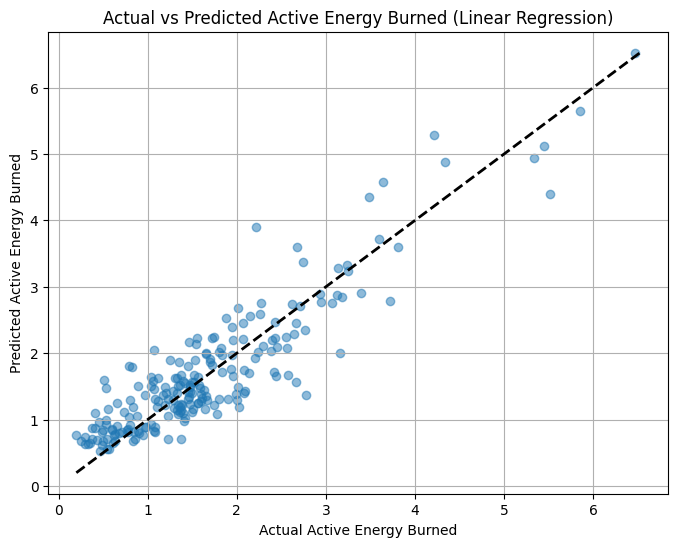

In [11]:
import matplotlib.pyplot as plt

# 1. Make predictions on the testing data
y_pred_lr = lr_model.predict(X_test_scaled_df)

# 2. Create a scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)

# 3. Add labels to the axes
plt.xlabel("Actual Active Energy Burned")
plt.ylabel("Predicted Active Energy Burned")

# 4. Add a title to the plot
plt.title("Actual vs Predicted Active Energy Burned (Linear Regression)")

# 5. Plot a diagonal line representing perfect predictions
max_val = max(y_test.max(), y_pred_lr.max())
min_val = min(y_test.min(), y_pred_lr.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# 6. Display the plot
plt.grid(True)
plt.show()

In [12]:
# Convert the dictionary to a pandas DataFrame for better display
ws_results_df = pd.DataFrame.from_dict(model_results, orient='index')

print("Walking Speed Model Evaluation Results:")
display(ws_results_df)

Walking Speed Model Evaluation Results:


,MAE,R2,RMSE
Linear Regression,0.348349,0.815659,0.448900
Random Forest,0.329458,0.753476,0.519120
XGBoost,0.343754,0.529276,0.717334


## Summary - Predicting ActiveEnergyBurned

### Data Analysis Key Findings

*   The data was successfully prepared for modeling by selecting relevant features and the target variable ('ActiveEnergyBurned'), handling missing values (dropping rows with missing target and imputing feature means), splitting the data into training and testing sets (80/20 split), and scaling the features.
*   Linear Regression, Random Forest, and XGBoost models were successfully trained on the prepared data.
*   Model evaluation on the test set showed the following performance metrics:
    *   **Linear Regression:** MAE = 0.3483, R² = 0.8157, RMSE = 0.4489
    *   **Random Forest:** MAE = 0.3295, R² = 0.7535, RMSE = 0.5191
    *   **XGBoost:** MAE = 0.3438, R² = 0.5293, RMSE = 0.7173
*   Based on the evaluation metrics, the Linear Regression model demonstrated the best overall performance with the highest R² (explaining the most variance) and the lowest RMSE (smallest prediction errors). The Random Forest model had the lowest MAE.
*   The Actual vs Predicted plot for the Linear Regression model shows a strong positive correlation between the actual and predicted values, indicating a good fit.



# Predict WalkingSpeed

* WalkingSpeed Regression
* Features: StepCount, HeartRate, DistanceWalkingRunning, WalkingStepLength, PhysicalEffort, WalkingHeartRateAverage, WalkingAsymmetryPercentage, WalkingDoubleSupportPercentage, StairAscentSpeed, StairDescentSpeed, weekday
* Models: LinearRegression + RandomForest + XGBoost
* Metrics: MAE, R², RMSE
* Visual: Actual vs Predicted plot

## Model training

In [13]:
# Select features and target for WalkingSpeed using the renamed column names
features_ws = ['StepCount',
               'HeartRate',
               'DistanceWalkingRunning',
               'WalkingStepLength',
               'PhysicalEffort',
               'WalkingHeartRateAverage',
               'WalkingAsymmetryPercentage',
               'WalkingDoubleSupportPercentage',
               'StairAscentSpeed',
               'StairDescentSpeed',
               'Weekday']
target_ws = 'WalkingSpeed'

# Create a new dataframe with only the selected features and target, dropping rows where the target is missing
df_ws_model = dataframes['cleaned_daily_health_data'][features_ws + [target_ws]].dropna(subset=[target_ws]).copy()

# Handle missing values in features using the mean
for feature in features_ws:
    if feature in df_ws_model.columns and df_ws_model[feature].isnull().any():
        df_ws_model[feature].fillna(df_ws_model[feature].mean(), inplace=True)

/tmp/ipython-input-2381143935.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ws_model[feature].fillna(df_ws_model[feature].mean(), inplace=True)


In [14]:
# Separate features (X) and target (y)
X_ws = df_ws_model[features_ws]
y_ws = df_ws_model[target_ws]

# Split data into training and testing sets
X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(X_ws, y_ws, test_size=0.2, random_state=42)

# Scale the feature variables
scaler_ws = StandardScaler()
X_train_scaled_ws = scaler_ws.fit_transform(X_train_ws)
X_test_scaled_ws = scaler_ws.transform(X_test_ws)

# Convert scaled arrays back to DataFrames for easier handling in the next steps
X_train_scaled_ws_df = pd.DataFrame(X_train_scaled_ws, columns=features_ws, index=X_train_ws.index)
X_test_scaled_ws_df = pd.DataFrame(X_test_scaled_ws, columns=features_ws, index=X_test_ws.index)

print("Walking Speed data preparation complete.")
print("X_train_scaled_ws_df shape:", X_train_scaled_ws_df.shape)
print("X_test_scaled_ws_df shape:", X_test_scaled_ws_df.shape)
print("y_train_ws shape:", y_train_ws.shape)
print("y_test_ws shape:", y_test_ws.shape)

display(X_train_scaled_ws_df.head())
display(y_train_ws.head())

Walking Speed data preparation complete.
X_train_scaled_ws_df shape: (1140, 11)
X_test_scaled_ws_df shape: (286, 11)
y_train_ws shape: (1140,)
y_test_ws shape: (286,)


,StepCount,HeartRate,DistanceWalkingRunning,WalkingStepLength,PhysicalEffort,WalkingHeartRateAverage,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,StairAscentSpeed,StairDescentSpeed,Weekday
1043,1.697949,0.015487,1.510407,-0.647417,-0.017424,0.005011,-0.209301,0.475030,0.015789,0.003378,1.420926
2075,-0.508041,2.571452,-0.407640,-0.592111,0.074611,4.525320,-0.787848,-0.470520,-1.194891,-1.149984,-0.535421
693,0.930637,0.015487,1.026805,1.767832,-0.017424,0.005011,-0.753541,-0.915863,0.015789,0.003378,1.420926
924,3.304277,0.015487,3.545462,1.804494,-0.017424,0.005011,-0.787848,-0.435949,0.015789,0.003378,1.420926
1837,-0.148266,0.015487,-0.092137,-0.040489,-0.017424,0.005011,-0.187469,-1.056820,0.015789,0.003378,-0.535421


,WalkingSpeed
1043,3.637440
2075,4.042286
693,5.534182
924,5.148000
1837,4.554000


In [15]:
# Instantiate and train Linear Regression model for Walking Speed
lr_ws_model = LinearRegression()
lr_ws_model.fit(X_train_scaled_ws_df, y_train_ws)
print("Linear Regression model for Walking Speed trained.")

# Instantiate and train RandomForestRegressor model for Walking Speed
rf_ws_model = RandomForestRegressor(random_state=42)
rf_ws_model.fit(X_train_scaled_ws_df, y_train_ws)
print("Random Forest model for Walking Speed trained.")

# Instantiate and train XGBoost model for Walking Speed
xgb_ws_model = XGBRegressor(random_state=42)
xgb_ws_model.fit(X_train_scaled_ws_df, y_train_ws)
print("XGBoost model for Walking Speed trained.")

Linear Regression model for Walking Speed trained.
Random Forest model for Walking Speed trained.
XGBoost model for Walking Speed trained.


## Model evaluation

In [16]:
# Create an empty dictionary to store the evaluation results for Walking Speed models
ws_model_results = {}

print("Walking Speed Model Evaluation Results:")

# Evaluate Linear Regression model for Walking Speed
ws_model_results['Linear Regression (WalkingSpeed)'] = evaluate_regression_model(
    lr_ws_model, X_test_scaled_ws_df, y_test_ws, 'Linear Regression (WalkingSpeed)'
)

# Evaluate RandomForestRegressor model for Walking Speed
ws_model_results['Random Forest (WalkingSpeed)'] = evaluate_regression_model(
    rf_ws_model, X_test_scaled_ws_df, y_test_ws, 'Random Forest (WalkingSpeed)'
)

# Evaluate XGBoost model for Walking Speed
ws_model_results['XGBoost (WalkingSpeed)'] = evaluate_regression_model(
    xgb_ws_model, X_test_scaled_ws_df, y_test_ws, 'XGBoost (WalkingSpeed)'
)

Walking Speed Model Evaluation Results:

Linear Regression (WalkingSpeed):
  MAE: 0.1885
  R2: 0.8067
  RMSE: 0.2583

Random Forest (WalkingSpeed):
  MAE: 0.1703
  R2: 0.8212
  RMSE: 0.2485

XGBoost (WalkingSpeed):
  MAE: 0.1902
  R2: 0.7689
  RMSE: 0.2825


## Model comparison

In [17]:
import matplotlib.pyplot as plt

# Use the compare_regression_models function to compare models for Walking Speed
compare_regression_models(ws_model_results, 'Walking Speed')

# 1. Make predictions on the testing data using the best Walking Speed model
# We need to determine the best model name from the comparison results to use here.
# Based on the output of compare_regression_models, Random Forest was the best based on R2.
best_ws_model_name = max(ws_model_results, key=lambda k: ws_model_results[k]['R2'])

Comparing Model Performance for Walking Speed:

Linear Regression (WalkingSpeed):
  MAE: 0.1885
  R2: 0.8067
  RMSE: 0.2583

Random Forest (WalkingSpeed):
  MAE: 0.1703
  R2: 0.8212
  RMSE: 0.2485

XGBoost (WalkingSpeed):
  MAE: 0.1902
  R2: 0.7689
  RMSE: 0.2825

Model with lowest MAE: Random Forest (WalkingSpeed) (MAE: 0.1703)
Model with lowest RMSE: Random Forest (WalkingSpeed) (RMSE: 0.2485)
Model with highest R2: Random Forest (WalkingSpeed) (R2: 0.8212)

Based on R2, the best performing model for Walking Speed is: Random Forest (WalkingSpeed)


## Visualization

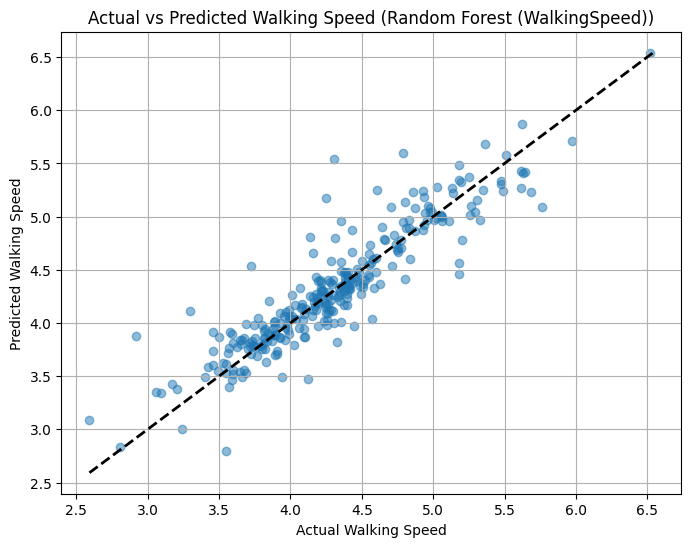

In [18]:
# 1. Make predictions on the testing data using the best Walking Speed model
if best_ws_model_name == 'Linear Regression (WalkingSpeed)':
    y_pred_best_ws = lr_ws_model.predict(X_test_scaled_ws_df)
elif best_ws_model_name == 'Random Forest (WalkingSpeed)':
    y_pred_best_ws = rf_ws_model.predict(X_test_scaled_ws_df)
else: # XGBoost (WalkingSpeed)
    y_pred_best_ws = xgb_ws_model.predict(X_test_scaled_ws_df)

# 2. Create a scatter plot comparing actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_ws, y_pred_best_ws, alpha=0.5)

# 3. Add labels to the axes
plt.xlabel("Actual Walking Speed")
plt.ylabel("Predicted Walking Speed")

# 4. Add a title to the plot
plt.title(f"Actual vs Predicted Walking Speed ({best_ws_model_name})")

# 5. Plot a diagonal line representing perfect predictions
max_val_ws = max(y_test_ws.max(), y_pred_best_ws.max())
min_val_ws = min(y_test_ws.min(), y_pred_best_ws.min())
plt.plot([min_val_ws, max_val_ws], [min_val_ws, max_val_ws], 'k--', lw=2)

# 6. Display the plot
plt.grid(True)
plt.show()

## Summary - Predicting WalkingSpeed

### Data Analysis Key Findings

* The `cleaned_daily_health_data` DataFrame was used as the source for Walking Speed data.
* `HKQuantityTypeIdentifierWalkingSpeed` (renamed to 'WalkingSpeed') was selected as the target variable for regression.
* Relevant features related to activity, heart rate, and other walking metrics were selected from the same DataFrame.
* Missing values in the selected features were imputed with the mean.
* The data was split into training and testing sets (80/20 split) and features were scaled.

### Model Performance and Comparison

* Linear Regression, Random Forest, and XGBoost models were trained on the prepared Walking Speed data.
* Model evaluation on the test set showed the following performance metrics:

In [19]:
# Convert the dictionary to a pandas DataFrame for better display
ws_results_df = pd.DataFrame.from_dict(ws_model_results, orient='index')

print("Walking Speed Model Evaluation Results:")
display(ws_results_df)

Walking Speed Model Evaluation Results:


,MAE,R2,RMSE
Linear Regression (WalkingSpeed),0.188450,0.806712,0.258345
Random Forest (WalkingSpeed),0.170337,0.821174,0.248493
XGBoost (WalkingSpeed),0.190235,0.768918,0.282476


# Classify AppleWalkingSteadiness

* AppleWalkingSteadiness Classification (Binarized: Low vs. High Steadiness)
* Target: AppleWalkingSteadiness_Binary
* Features: StepCount, HeartRate, DistanceWalkingRunning, WalkingSpeed, WalkingStepLength, PhysicalEffort, WalkingHeartRateAverage, WalkingAsymmetryPercentage, WalkingDoubleSupportPercentage, StairAscentSpeed, StairDescentSpeed, weekday
* Models: Logistic Regression + RandomForest + XGBoost
* Metrics: Accuracy, Precision, Recall, F1-score, ROC AUC
* Visual: Confusion Matrix

## Model training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Select target and potential features for AppleWalkingSteadiness classification using renamed column names
target_ws_class = 'WalkingSteadiness'

# Based on the available columns and common sense, let's select some features that might influence walking steadiness.
features_ws_class = ['StepCount',
                     'HeartRate',
                     'DistanceWalkingRunning',
                     'WalkingSpeed',
                     'WalkingStepLength',
                     'PhysicalEffort',
                     'WalkingHeartRateAverage',
                     'WalkingAsymmetryPercentage',
                     'WalkingDoubleSupportPercentage',
                     'StairAscentSpeed',
                     'StairDescentSpeed',
                     'Weekday']


# Create a new dataframe with selected features and target, dropping rows where the target is missing
df_ws_class_model = dataframes['cleaned_daily_health_data'][features_ws_class + [target_ws_class]].dropna(subset=[target_ws_class]).copy()

# Handle missing values in features using the mean
for feature in features_ws_class:
    if df_ws_class_model[feature].isnull().any():
        df_ws_class_model[feature].fillna(df_ws_class_model[feature].mean(), inplace=True)

/tmp/ipython-input-2756398516.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ws_class_model[feature].fillna(df_ws_class_model[feature].mean(), inplace=True)


In [21]:
# --- Binarize the WalkingSteadiness target variable ---
# Let's use a threshold to create two classes: 'Low Steadiness' and 'High Steadiness'
# We can use the 25th percentile as a potential threshold
threshold = df_ws_class_model[target_ws_class].quantile(0.25)
df_ws_class_model['WalkingSteadiness_Binary'] = df_ws_class_model[target_ws_class].apply(
    lambda x: 'Low Steadiness' if x < threshold else 'High Steadiness')

# Update the target variable to the new binary column
target_ws_class = 'WalkingSteadiness_Binary'

# --- Encode the binary target variable into numerical labels ---
label_encoder = LabelEncoder()
df_ws_class_model[target_ws_class] = label_encoder.fit_transform(df_ws_class_model[target_ws_class])

# Check the distribution of the new binary target variable
print("Distribution of the binary target variable (WalkingSteadiness_Binary):")
print(df_ws_class_model[target_ws_class].value_counts())


# Separate features (X) and target (y)
X_ws_class = df_ws_class_model[features_ws_class]
y_ws_class = df_ws_class_model[target_ws_class]


# Split data into training and testing sets
# We need to consider stratification if the classes are imbalanced, but for simplicity, we'll do a basic split first.
X_train_ws_class, X_test_ws_class, y_train_ws_class, y_test_ws_class = train_test_split(
    X_ws_class, y_ws_class, test_size=0.2, random_state=42)

Distribution of the binary target variable (WalkingSteadiness_Binary):
WalkingSteadiness_Binary
0    146
1     49
Name: count, dtype: int64


In [22]:
# Scale the feature variables
scaler_ws_class = StandardScaler()
X_train_scaled_ws_class = scaler_ws_class.fit_transform(X_train_ws_class)
X_test_scaled_ws_class = scaler_ws_class.transform(X_test_ws_class)

# Convert scaled arrays back to DataFrames
X_train_scaled_ws_class_df = pd.DataFrame(X_train_scaled_ws_class, columns=features_ws_class, index=X_train_ws_class.index)
X_test_scaled_ws_class_df = pd.DataFrame(X_test_scaled_ws_class, columns=features_ws_class, index=X_test_ws_class.index)

print("\nWalking Steadiness data preparation complete.")
print("X_train_scaled_ws_class_df shape:", X_train_scaled_ws_class_df.shape)
print("X_test_scaled_ws_class_df shape:", X_test_scaled_ws_class_df.shape)
print("y_train_ws_class shape:", y_train_ws_class.shape)
print("y_test_ws_class shape:", y_test_ws_class.shape)

display(X_train_scaled_ws_class_df.head())
display(y_train_ws_class.head())


Walking Steadiness data preparation complete.
X_train_scaled_ws_class_df shape: (156, 12)
X_test_scaled_ws_class_df shape: (39, 12)
y_train_ws_class shape: (156,)
y_test_ws_class shape: (39,)


,StepCount,HeartRate,DistanceWalkingRunning,WalkingSpeed,WalkingStepLength,PhysicalEffort,WalkingHeartRateAverage,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,StairAscentSpeed,StairDescentSpeed,Weekday
1042,-0.761645,-0.073533,-0.622638,0.735317,1.192466,-0.084618,-0.053069,-1.017552,-0.108434,-0.046103,-0.007554,0.367773
1973,-0.149817,0.041133,-0.487817,0.282564,0.413692,3.347563,3.097592,-1.017552,-0.297729,0.586191,1.380234,0.367773
1882,-0.661538,-2.084127,-0.481886,-0.058810,-0.076222,0.009965,-2.053976,0.027074,0.055015,0.162639,1.327954,0.367773
2197,0.395461,0.603365,-0.323409,-0.470899,-0.143462,0.378833,-0.944408,0.848255,1.156698,-2.287841,-1.386671,0.367773
1623,-1.076027,-0.073533,-0.934430,-0.058810,-0.076222,-0.084618,-0.053069,0.027074,0.055015,-0.046103,-0.007554,0.367773


,WalkingSteadiness_Binary
1042,0
1973,0
1882,1
2197,1
1623,0


### Fit the model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Instantiate and train Logistic Regression model for Walking Steadiness classification
lr_ws_class_model = LogisticRegression(random_state=42)
lr_ws_class_model.fit(X_train_scaled_ws_class_df, y_train_ws_class)
print("Logistic Regression model for Walking Steadiness classification trained.")

# Instantiate and train RandomForestClassifier model for Walking Steadiness classification
rf_ws_class_model = RandomForestClassifier(random_state=42)
rf_ws_class_model.fit(X_train_scaled_ws_class_df, y_train_ws_class)
print("Random Forest model for Walking Steadiness classification trained.")

# Instantiate and train XGBoost model for Walking Steadiness classification
xgb_ws_class_model = XGBClassifier(random_state=42)
xgb_ws_class_model.fit(X_train_scaled_ws_class_df, y_train_ws_class)
print("XGBoost model for Walking Steadiness classification trained.")

Logistic Regression model for Walking Steadiness classification trained.
Random Forest model for Walking Steadiness classification trained.
XGBoost model for Walking Steadiness classification trained.


## Model evaluation

### Define evaluation function for classification models

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification_model(model, X_test, y_test, model_name):
    """
    Evaluates a classification model and returns common metrics.

    Args:
        model: Trained classification model.
        X_test: Test features.
        y_test: Test target labels.
        model_name: Name of the model for printing.

    Returns:
        dict: A dictionary containing the evaluation metrics.
    """
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    metrics = {'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1-score': f1,
               'ROC AUC': roc_auc}

    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-score: {metrics['F1-score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

    return metrics

In [25]:
# Create an empty dictionary to store the evaluation results for Walking Steadiness classification models
ws_class_model_results = {}

print("Walking Steadiness Classification Model Evaluation Results:")

# Evaluate Logistic Regression model
ws_class_model_results['Logistic Regression (WalkingSteadiness)'] = evaluate_classification_model(
    lr_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class, 'Logistic Regression (WalkingSteadiness)'
)

# Evaluate RandomForestClassifier model
ws_class_model_results['Random Forest (WalkingSteadiness)'] = evaluate_classification_model(
    rf_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class, 'Random Forest (WalkingSteadiness)'
)

# Evaluate XGBoost model
ws_class_model_results['XGBoost (WalkingSteadiness)'] = evaluate_classification_model(
    xgb_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class, 'XGBoost (WalkingSteadiness)'
)

Walking Steadiness Classification Model Evaluation Results:

Logistic Regression (WalkingSteadiness):
  Accuracy: 0.8718
  Precision: 1.0000
  Recall: 0.2857
  F1-score: 0.4444
  ROC AUC: 0.5714

Random Forest (WalkingSteadiness):
  Accuracy: 0.6667
  Precision: 0.1250
  Recall: 0.1429
  F1-score: 0.1333
  ROC AUC: 0.6652

XGBoost (WalkingSteadiness):
  Accuracy: 0.6923
  Precision: 0.1429
  Recall: 0.1429
  F1-score: 0.1429
  ROC AUC: 0.6317


## Model comparison

### Define comparison function for classification models

In [50]:
def compare_classification_models(model_results, task_name):
    """
    Compares classification model performance based on various metrics.

    Args:
        model_results (dict): A dictionary where keys are model names and values are dictionaries
                              containing classification metrics (e.g., 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC').
        task_name (str): The name of the classification task (e.g., 'Walking Steadiness').
    """
    print(f"Comparing Model Performance for {task_name}:")
    # Convert the dictionary to a pandas DataFrame for better display
    results_df = pd.DataFrame.from_dict(model_results, orient='index')
    display(results_df)

    # Analyze the model_results dictionary to determine the best model
    print(f"\nComparing {task_name} Model Performance:")
    for model_name, metrics in model_results.items():
        print(f"\n{model_name}:")
        print(f"  Accuracy: {metrics.get('Accuracy'):.4f}")
        print(f"  Precision: {metrics.get('Precision'):.4f}")
        print(f"  Recall: {metrics.get('Recall'):.4f}")
        print(f"  F1-score: {metrics.get('F1-score'):.4f}")
        print(f"  ROC AUC: {metrics.get('ROC AUC'):.4f}")

    # Determine the best model based on key classification metrics
    # Use .get() with a default value (like -1 for scores) to handle potential missing metrics
    best_accuracy_model = max(model_results, key=lambda k: model_results[k].get('Accuracy', -1))
    best_precision_model = max(model_results, key=lambda k: model_results[k].get('Precision', -1))
    best_recall_model = max(model_results, key=lambda k: model_results[k].get('Recall', -1))
    best_f1_model = max(model_results, key=lambda k: model_results[k].get('F1-score', -1))
    best_roc_auc_model = max(model_results, key=lambda k: model_results[k].get('ROC AUC', -1))

    print(f"\nModel with highest Accuracy: {best_accuracy_model} (Accuracy: {model_results[best_accuracy_model].get('Accuracy'):.4f})")
    print(f"Model with highest Precision: {best_precision_model} (Precision: {model_results[best_precision_model].get('Precision'):.4f})")
    print(f"Model with highest Recall: {best_recall_model} (Recall: {model_results[best_recall_model].get('Recall'):.4f})")
    print(f"Model with highest F1-score: {best_f1_model} (F1-score: {model_results[best_f1_model].get('F1-score'):.4f})")
    print(f"Model with highest ROC AUC: {best_roc_auc_model} (ROC AUC: {model_results[best_roc_auc_model].get('ROC AUC'):.4f})")

    # Based on the results, identify the best performing model overall.
    # For imbalanced datasets, F1-score and ROC AUC are often more informative than Accuracy.
    # Let's prioritize ROC AUC for overall ability to distinguish classes.
    best_overall_model = best_roc_auc_model
    print(f"\nBased on ROC AUC, the best performing model for {task_name} is: {best_overall_model}")

    return best_overall_model

In [51]:
# Use the new compare_classification_models function for Walking Steadiness classification
best_ws_class_model_name = compare_classification_models(ws_class_model_results, 'Walking Steadiness Classification')

Comparing Model Performance for Walking Steadiness Classification:


,Accuracy,Precision,Recall,F1-score,ROC AUC
Logistic Regression (WalkingSteadiness),0.871795,1.000000,0.285714,0.444444,0.571429
Random Forest (WalkingSteadiness),0.666667,0.125000,0.142857,0.133333,0.665179
XGBoost (WalkingSteadiness),0.692308,0.142857,0.142857,0.142857,0.631696



Comparing Walking Steadiness Classification Model Performance:

Logistic Regression (WalkingSteadiness):
  Accuracy: 0.8718
  Precision: 1.0000
  Recall: 0.2857
  F1-score: 0.4444
  ROC AUC: 0.5714

Random Forest (WalkingSteadiness):
  Accuracy: 0.6667
  Precision: 0.1250
  Recall: 0.1429
  F1-score: 0.1333
  ROC AUC: 0.6652

XGBoost (WalkingSteadiness):
  Accuracy: 0.6923
  Precision: 0.1429
  Recall: 0.1429
  F1-score: 0.1429
  ROC AUC: 0.6317

Model with highest Accuracy: Logistic Regression (WalkingSteadiness) (Accuracy: 0.8718)
Model with highest Precision: Logistic Regression (WalkingSteadiness) (Precision: 1.0000)
Model with highest Recall: Logistic Regression (WalkingSteadiness) (Recall: 0.2857)
Model with highest F1-score: Logistic Regression (WalkingSteadiness) (F1-score: 0.4444)
Model with highest ROC AUC: Random Forest (WalkingSteadiness) (ROC AUC: 0.6652)

Based on ROC AUC, the best performing model for Walking Steadiness Classification is: Random Forest (WalkingSteadines

## Visualization

### Define a function for confusion matrics plot

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test, title, ax, display_labels):
    """
    Generates and displays a confusion matrix for a classification model on a given axes.

    Args:
        model: Trained classification model.
        X_test: Test features.
        y_test: Test target labels.
        title: Title for the confusion matrix plot.
        ax: Matplotlib axes object to draw the plot on.
        display_labels: Labels to display on the confusion matrix axes.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(ax=ax)
    ax.set_title(title)

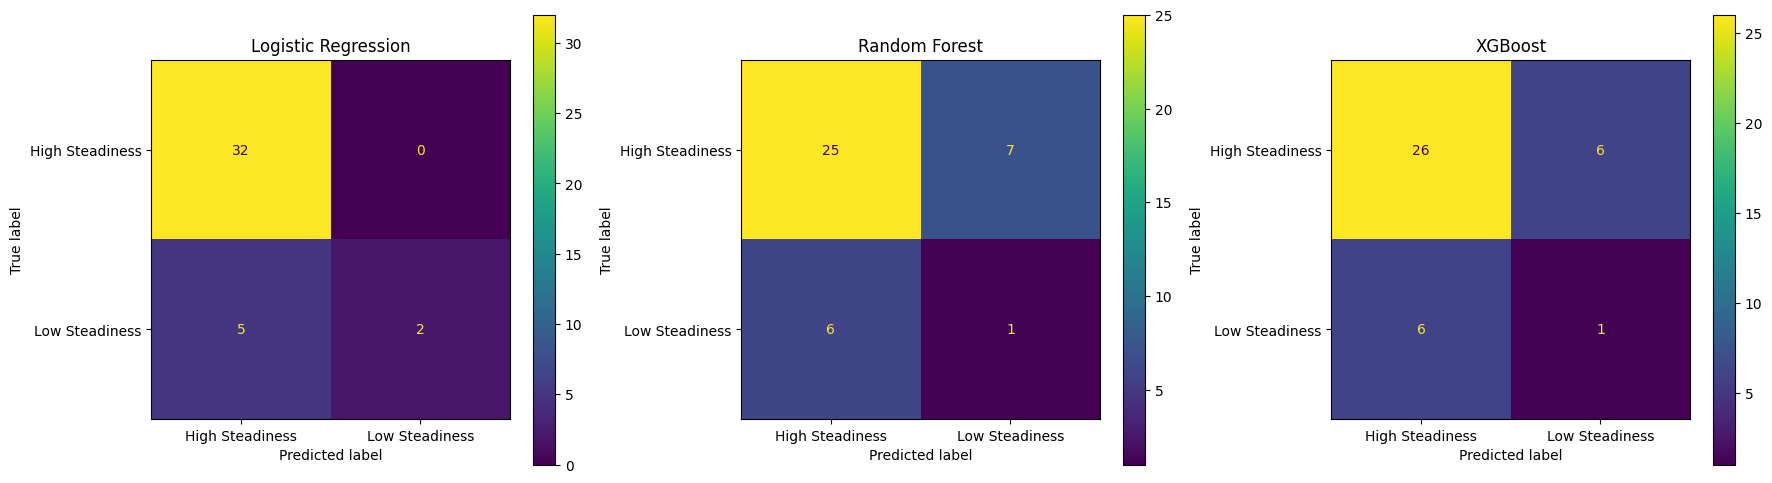

In [28]:
# Define display labels based on the binarization (assuming 0 is High and 1 is Low based on value_counts() output)
display_labels = ['High Steadiness', 'Low Steadiness']

# Create subplots for the three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Plot confusion matrix for Logistic Regression on the first subplot
plot_confusion_matrix(lr_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class,
                      'Logistic Regression', axes[0], display_labels)

# Plot confusion matrix for Random Forest on the second subplot
plot_confusion_matrix(rf_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class,
                      'Random Forest', axes[1], display_labels)

# Plot confusion matrix for XGBoost on the third subplot
plot_confusion_matrix(xgb_ws_class_model, X_test_scaled_ws_class_df, y_test_ws_class,
                      'XGBoost', axes[2], display_labels)

plt.tight_layout()
plt.show()

## Summary - Classifying AppleWalkingSteadiness

### Data Analysis Key Findings

* The `cleaned_daily_health_data` DataFrame was used as the source for Apple Walking Steadiness data.
* `HKQuantityTypeIdentifierAppleWalkingSteadiness` (renamed to 'WalkingSteadiness') was selected as the target variable for classification.
* The target variable was binarized into 'Low Steadiness' and 'High Steadiness' based on the 25th percentile as a threshold.
* The binary target variable was encoded into numerical labels (0 and 1).
* Relevant features related to activity, heart rate, and walking metrics were selected.
* Missing values in the selected features were imputed with the mean.
* The data was split into training and testing sets (80/20 split) and features were scaled.

### Model Performance and Comparison

* Logistic Regression, Random Forest, and XGBoost classification models were trained on the prepared data.
* Model evaluation on the test set showed the performance metrics in the following code block.

In [29]:
# Convert the dictionary to a pandas DataFrame for better display
ws_class_results_df = pd.DataFrame.from_dict(ws_class_model_results, orient='index')

print("Walking Steadiness Classification Model Evaluation Results:")
display(ws_class_results_df)

Walking Steadiness Classification Model Evaluation Results:


,Accuracy,Precision,Recall,F1-score,ROC AUC
Logistic Regression (WalkingSteadiness),0.871795,1.000000,0.285714,0.444444,0.571429
Random Forest (WalkingSteadiness),0.666667,0.125000,0.142857,0.133333,0.665179
XGBoost (WalkingSteadiness),0.692308,0.142857,0.142857,0.142857,0.631696


# Classify Active vs. Sedentary Days

* Active vs. Sedentary Day Classification
* Target: Activity_Level (Binarized: Sedentary vs. Active)
* Source: ActiveEnergyBurned or StepCount
* Features: StepCount, HeartRate, DistanceWalkingRunning, WalkingSpeed, WalkingStepLength, PhysicalEffort
* Models: Logistic Regression + RandomForest + XGBoost
* Metrics: Accuracy, Precision, Recall, F1-score, ROC AUC
* Visual: Confusion Matrix

## Data preparation


In [38]:
from sklearn.preprocessing import LabelEncoder

# Choose 'ActiveEnergyBurned' as the target variable for classification.
target_activity = 'ActiveEnergyBurned'

# Select relevant features. Using features from the previous ActiveEnergyBurned prediction task.
features_activity = ['StepCount',
                     'HeartRate',
                     'DistanceWalkingRunning',
                     'WalkingSpeed',
                     'WalkingStepLength',
                     'PhysicalEffort']


# Create a new dataframe with selected features and target.
df_activity_model = dataframes['cleaned_daily_health_data'][features_activity + [target_activity]].copy()

# Handle missing values.
# Drop rows where the target variable is missing
df_activity_model.dropna(subset=[target_activity], inplace=True)

# Impute missing values in features using the mean
for feature in features_activity:
    if feature in df_activity_model.columns and df_activity_model[feature].isnull().any():
        df_activity_model[feature].fillna(df_activity_model[feature].mean(), inplace=True)

# Create a new binary target variable ('Activity_Level')
# Using the median of the target variable as a threshold
threshold_activity = df_activity_model[target_activity].median()
df_activity_model['Activity_Level'] = df_activity_model[target_activity].apply(
    lambda x: 0 if x < threshold_activity else 1) # 0 for Sedentary, 1 for Active

# Update the target variable to the new binary column
target_activity_binary = 'Activity_Level'

# Print the value counts of the newly created binary target variable
print("Distribution of the binary target variable (Activity_Level):")
print(df_activity_model[target_activity_binary].value_counts())

Distribution of the binary target variable (Activity_Level):
Activity_Level
1    528
0    527
Name: count, dtype: int64


/tmp/ipython-input-961119488.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_activity_model[feature].fillna(df_activity_model[feature].mean(), inplace=True)


In [39]:
# Separate features (X) and target (y)
X_activity = df_activity_model[features_activity]
y_activity = df_activity_model[target_activity_binary]

# Split data into training and testing sets
X_train_activity, X_test_activity, y_train_activity, y_test_activity = train_test_split(
    X_activity, y_activity, test_size=0.2, random_state=42, stratify=y_activity) # Stratify to maintain class distribution

# Scale the feature variables
scaler_activity = StandardScaler()
X_train_scaled_activity = scaler_activity.fit_transform(X_train_activity)
X_test_scaled_activity = scaler_activity.transform(X_test_activity)

# Convert scaled arrays back to DataFrames for easier handling
X_train_scaled_activity_df = pd.DataFrame(X_train_scaled_activity, columns=features_activity, index=X_train_activity.index)
X_test_scaled_activity_df = pd.DataFrame(X_test_scaled_activity, columns=features_activity, index=X_test_activity.index)

print("Activity Level data preparation complete.")
print("X_train_scaled_activity_df shape:", X_train_scaled_activity_df.shape)
print("X_test_scaled_activity_df shape:", X_test_scaled_activity_df.shape)
print("y_train_activity shape:", y_train_activity.shape)
print("y_test_activity shape:", y_test_activity.shape)

display(X_train_scaled_activity_df.head())
display(y_train_activity.head())

Activity Level data preparation complete.
X_train_scaled_activity_df shape: (844, 6)
X_test_scaled_activity_df shape: (211, 6)
y_train_activity shape: (844,)
y_test_activity shape: (211,)


,StepCount,HeartRate,DistanceWalkingRunning,WalkingSpeed,WalkingStepLength,PhysicalEffort
1496,-1.160954,0.019208,-1.088230,0.019228,0.018274,0.003106
2190,-0.498923,-1.369577,-0.320652,-1.923031,-1.573400,-1.058713
2046,-0.097306,0.874319,-0.443602,-0.931519,-1.106654,-0.453451
1575,3.056811,0.019208,3.348319,0.570260,0.266462,0.003106
1618,-0.044024,0.019208,-0.047773,-0.991009,-1.010560,0.003106


,Activity_Level
1496,0
2190,0
2046,1
1575,1
1618,0


## Model training

Train the Logistic Regression, Random Forest, and XGBoost classification models using the scaled training data.


In [46]:
# Instantiate and train Logistic Regression model for Activity Level classification
lr_activity_model = LogisticRegression(random_state=42)
lr_activity_model.fit(X_train_scaled_activity_df, y_train_activity)
print("Logistic Regression model for Activity Level classification trained.")

# Instantiate and train RandomForestClassifier model for Activity Level classification
rf_activity_model = RandomForestClassifier(random_state=42)
rf_activity_model.fit(X_train_scaled_activity_df, y_train_activity)
print("Random Forest model for Activity Level classification trained.")

# Instantiate and train XGBoost model for Activity Level classification
xgb_activity_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_activity_model.fit(X_train_scaled_activity_df, y_train_activity)
print("XGBoost model for Activity Level classification trained.")

Logistic Regression model for Activity Level classification trained.
Random Forest model for Activity Level classification trained.
XGBoost model for Activity Level classification trained.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:01:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Model evaluation



In [41]:
# Create an empty dictionary to store the evaluation results for Activity Level models
activity_model_results = {}

print("Activity Level Classification Model Evaluation Results:")

# Evaluate Logistic Regression model for Activity Level classification
activity_model_results['Logistic Regression (Activity)'] = evaluate_classification_model(
    lr_activity_model, X_test_scaled_activity_df, y_test_activity, 'Logistic Regression (Activity)'
)

# Evaluate RandomForestClassifier model for Activity Level classification
activity_model_results['Random Forest (Activity)'] = evaluate_classification_model(
    rf_activity_model, X_test_scaled_activity_df, y_test_activity, 'Random Forest (Activity)'
)

# Evaluate XGBoost model for Activity Level classification
activity_model_results['XGBoost (Activity)'] = evaluate_classification_model(
    xgb_activity_model, X_test_scaled_activity_df, y_test_activity, 'XGBoost (Activity)'
)

Activity Level Classification Model Evaluation Results:

Logistic Regression (Activity):
  Accuracy: 0.7962
  Precision: 0.8182
  Recall: 0.7642
  F1-score: 0.7902
  ROC AUC: 0.8931

Random Forest (Activity):
  Accuracy: 0.8152
  Precision: 0.7863
  Recall: 0.8679
  F1-score: 0.8251
  ROC AUC: 0.8948

XGBoost (Activity):
  Accuracy: 0.8009
  Precision: 0.7807
  Recall: 0.8396
  F1-score: 0.8091
  ROC AUC: 0.8925


## Model comparison



In [49]:
# Use the new compare_classification_models function for Activity Level classification
best_activity_model_name = compare_classification_models(activity_model_results, 'Activity Level Classification')

Comparing Model Performance for Activity Level Classification:


,Accuracy,Precision,Recall,F1-score,ROC AUC
Logistic Regression (Activity),0.796209,0.818182,0.764151,0.790244,0.893082
Random Forest (Activity),0.815166,0.786325,0.867925,0.825112,0.894834
XGBoost (Activity),0.800948,0.780702,0.839623,0.809091,0.892543



Comparing Activity Level Classification Model Performance:

Logistic Regression (Activity):
  Accuracy: 0.7962
  Precision: 0.8182
  Recall: 0.7642
  F1-score: 0.7902
  ROC AUC: 0.8931

Random Forest (Activity):
  Accuracy: 0.8152
  Precision: 0.7863
  Recall: 0.8679
  F1-score: 0.8251
  ROC AUC: 0.8948

XGBoost (Activity):
  Accuracy: 0.8009
  Precision: 0.7807
  Recall: 0.8396
  F1-score: 0.8091
  ROC AUC: 0.8925

Model with highest Accuracy: Random Forest (Activity) (Accuracy: 0.8152)
Model with highest Precision: Logistic Regression (Activity) (Precision: 0.8182)
Model with highest Recall: Random Forest (Activity) (Recall: 0.8679)
Model with highest F1-score: Random Forest (Activity) (F1-score: 0.8251)
Model with highest ROC AUC: Random Forest (Activity) (ROC AUC: 0.8948)

Based on ROC AUC, the best performing model for Activity Level Classification is: Random Forest (Activity)


## Visualization

Create a confusion matrix for each model to visualize their performance in classifying 'Active Day' vs. 'Sedentary Day'.


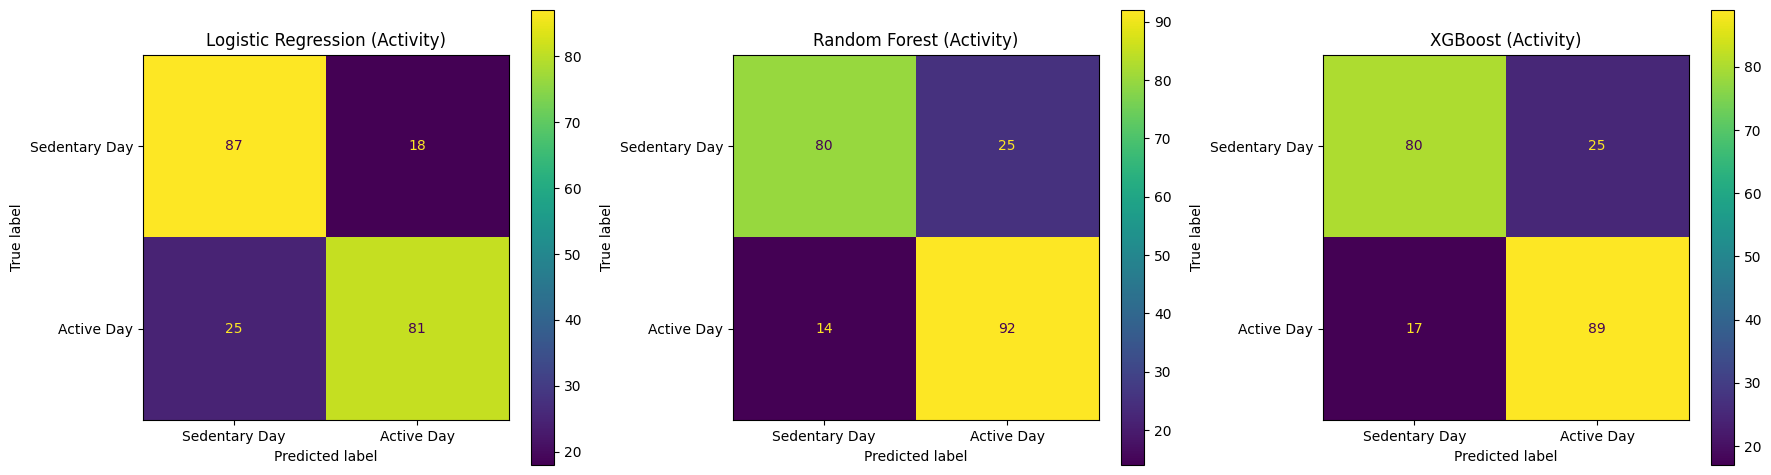

In [43]:
# Define display labels based on the binary target variable (assuming 0 is Sedentary and 1 is Active based on the split logic)
display_labels_activity = ['Sedentary Day', 'Active Day']

# Create subplots for the three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Plot confusion matrix for Logistic Regression on the first subplot
plot_confusion_matrix(lr_activity_model, X_test_scaled_activity_df, y_test_activity,
                      'Logistic Regression (Activity)', axes[0], display_labels_activity)

# Plot confusion matrix for Random Forest on the second subplot
plot_confusion_matrix(rf_activity_model, X_test_scaled_activity_df, y_test_activity,
                      'Random Forest (Activity)', axes[1], display_labels_activity)

# Plot confusion matrix for XGBoost on the third subplot
plot_confusion_matrix(xgb_activity_model, X_test_scaled_activity_df, y_test_activity,
                      'XGBoost (Activity)', axes[2], display_labels_activity)

plt.tight_layout()
plt.show()

## Summary - Classifying Active vs. Sedentary Days

### Insights from Confusion Matrices

* The confusion matrices visually demonstrate each model's performance in classifying Active vs. Sedentary days.
* The Random Forest model correctly classified a high number of both Active and Sedentary days, as indicated by the large values on the diagonal of its confusion matrix.
* The off-diagonal values show the misclassifications (e.g., predicting Sedentary when it was Active, or vice-versa).
* Comparing the matrices, Random Forest appears to have a better balance in predicting both classes accurately compared to Logistic Regression and XGBoost.

### Model Performance and Comparison

* Logistic Regression, Random Forest, and XGBoost classification models were trained on the prepared data.
* Model evaluation on the test set showed the following performance metrics in the next code block.
* Based on the evaluation metrics, the Random Forest model demonstrated the best overall performance with the highest Accuracy, F1-score, and ROC AUC, indicating a good balance of precision and recall and overall ability to distinguish between the two classes.

In [44]:
# Convert the dictionary to a pandas DataFrame for better display
activity_results_df = pd.DataFrame.from_dict(activity_model_results, orient='index')

print("Activity Level Classification Model Evaluation Results:")
display(activity_results_df)

Activity Level Classification Model Evaluation Results:


,Accuracy,Precision,Recall,F1-score,ROC AUC
Logistic Regression (Activity),0.796209,0.818182,0.764151,0.790244,0.893082
Random Forest (Activity),0.815166,0.786325,0.867925,0.825112,0.894834
XGBoost (Activity),0.800948,0.780702,0.839623,0.809091,0.892543
